<a href="https://colab.research.google.com/github/Anitesh123/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Defaulter Prediction.



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member-1**   - Bvamsi Krishna
##### **Team Member-2**   - Moin Quraishi
##### **Team Member-3**   - Anitesh Kumar



# **Project Summary -**

* First of all we were provided with a data set of Taiwan. We studied dataset it has 30000 rows and 25 columns. This data does not have any duplicates or any null or missing values.
* After making some changes in column names for better understanding of the dataset, and performing some data manipulation we were ready to go with EDA of given data.
* In our EDA we found various insights about our data such as Both classes of our target variable are not in proportion that is we have imbalanced dataset.And Even though the number of male customers are less compared to the female, the percentage of defaulters is high in Male customers. As the more number of defaulters are between the Age of 20 to 25, and greater than 60 years even the customers are less. Proper review has to be done before issueing the credit card. Else it may impact the business growth negatively.And our target variable Default is positively correlated to Education, Age, Bill Amount6 and Past payment statues(1-6). Bill Amounts are highly correlated to each other. Past Payments Stauts are also highly correlated to each other.
* After EDA we handeled outliers and Label encoding and one hot encoding on our dataset. And then for handling class imbalance we have used *"SMOTE"* - Synthetic Minority Oversampling Technique in this technique we generally oversample the minority class such as in our data the number of defaulters and non defaulters have a difference to overcome that we used SMOTE.
 * Then we perfomed a standard scaler data transformation technique in our dataset. And split our data into training & testing data.  
* After spliting the data we started building our baseline model and fitting the data set into them. We have used 3 models -  Random Forest Classifier, Descision Tree and XG Boost.
* After fitting the data into these models we evaluated the scores and made a combined ROC curve chart.
* After this we applied hyperparamenter Tunning and cross validation technique Gridsearch  CV into these models and then evaluted and compared the scores again.
* From all baseline model, Random forest classifier shows highest test accuracy and F1 score and AUC & After cross validation and hyperparameter tunning, XG Boost shows highest test accuracy score of 87.10% and AUC is 0.874.

* Credit risk plays a major role in the banking industry business. Banks main sources for income are granting loans through various schemes, credit card, investment, mortgage, and others. Credit card has been one of the most booming financial services by banks over the past years. However, with the growing number of credit card users, banks have been facing an escalating credit card default rate.
As credit cards provide a least of 30 days, and some provide 45 days, to pay back the borrowed money.However, when consuming, people often lack rational thinking and overestimate their ability to repay loans to banks in time. On the one hand, it increases the loan risk of banks.With a large number of banks selling credit cards, the phenomenon of credit card default emerges one after another. It is very important for banks to effectively identify high-risk credit card default users.

#Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

ID: Customer ID

LIMIT_BAL: Amount of the given credit: it includes both the individual consumer credit and his/her family (supplementary) credit.

Gender: Type of gender Male/Female/Others. (1 = male; 2 = female).

Education: Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marriage: Married/Un-married (1 = married; 2 = single; 3 = others).

Age: Age of the card holder in years.

PAY_0 to PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: Pay_0 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;Pay_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

# **GitHub Link -**

[link text](https://github.com/BoyinaVamsi/Credit-Card-Default-Prediction-Capstone-project-)

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/default of credit card clients.xls - Data.csv',header=1)

### Dataset First View

In [ ]:
# Observing the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Shape of the datset is : ",df.shape)

Shape of the datset is :  (30000, 25)


### Dataset Information

In [ ]:
# Complete information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("The number of duplicated features present in dataset are : ",len(df[df.duplicated()]))
print("The number of unique ID's are : ",df.ID.nunique())

The number of duplicated features present in dataset are :  0
The number of unique ID's are :  30000


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#check for null values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<AxesSubplot:>

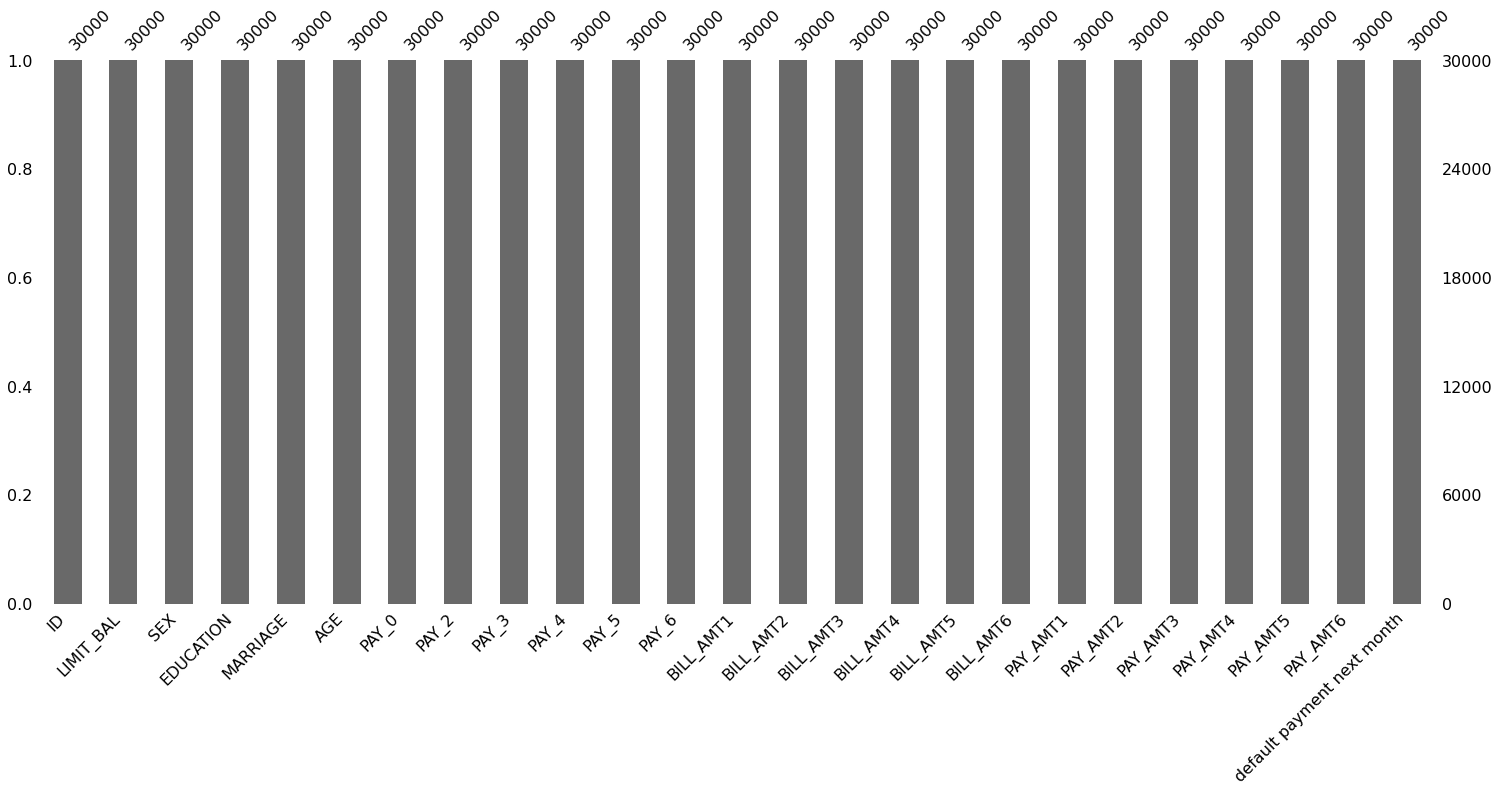

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

This dataset holds the information of customers who are using credit card services, and we have to analysis the data and find the insights about the customers who deafaults.

The above dataset has 30000 rows and 25 features. There are no mising values and duplicate features in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [ ]:
#summary of dataset
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# **Data Preprocessing**

**Changing name of some columns for simplicity and better understanding**

In [ ]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [ ]:
#check for columns name
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [ ]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print("The number of unique values in ", col, " are: ", df[col].nunique())

The number of unique values in  ID  are:  30000
The number of unique values in  LIMIT_BAL  are:  81
The number of unique values in  SEX  are:  2
The number of unique values in  EDUCATION  are:  7
The number of unique values in  MARRIAGE  are:  4
The number of unique values in  AGE  are:  56
The number of unique values in  PAY_SEPT  are:  11
The number of unique values in  PAY_AUG  are:  11
The number of unique values in  PAY_JUL  are:  11
The number of unique values in  PAY_JUN  are:  11
The number of unique values in  PAY_MAY  are:  10
The number of unique values in  PAY_APR  are:  10
The number of unique values in  BILL_AMT_SEPT  are:  22723
The number of unique values in  BILL_AMT_AUG  are:  22346
The number of unique values in  BILL_AMT_JUL  are:  22026
The number of unique values in  BILL_AMT_JUN  are:  21548
The number of unique values in  BILL_AMT_MAY  are:  21010
The number of unique values in  BILL_AMT_APR  are:  20604
The number of unique values in  PAY_AMT_SEPT  are:  7943
T

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Dropping the ID column.
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
#Renaming the dataset columns for better usability
df.rename(columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"}, inplace=True)

In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,Male,High School,Married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,No
29996,150000,Male,High School,Single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,No
29997,30000,Male,University,Single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,Yes
29998,80000,Male,High School,Married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Yes


In [ ]:
#Unique values in Sex are:
df.SEX.value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

The number of Female are 11888 and Male are 18112.
1 = Male; 2 = Female.


In [ ]:
#Unique values in Education are:
df.EDUCATION.value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64


Education level: 1 = graduate school; 2 = university; 3 = high school; 4 = others, As no data was provided for level 5, 6 and 0 are treated as others.


In [ ]:
#Replacing not defined data values in Education Column.
df.EDUCATION.replace(to_replace=[0,5,6],value=4,inplace=True )
df.EDUCATION.value_counts()

University         14030
Graduate School    10585
High School         4917
4                    345
Others               123
Name: EDUCATION, dtype: int64

In [ ]:
#Unique values in Marriage are:
df.MARRIAGE.value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

1 = Married; 2 = Single; 3 = Others, so the values not defined in data are treated as Others.

In [ ]:
#Replacing not defined data values in Marriage Column.
df.MARRIAGE.replace(to_replace=0,value=3,inplace=True )
df.MARRIAGE.value_counts()

Single     15964
Married    13659
Others       323
3             54
Name: MARRIAGE, dtype: int64

In [ ]:
#Unique values in Pay_0 are:
df.PAY_SEPT.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_SEPT, dtype: int64

### What all manipulations have you done and insights you found?



1. Deleted ID column as it represents the customer Identification only.

2. Modified the Column names for better usage.

3. Updated the values present in Marriage as 1 = Married; 2 = Single;   3 = Others, so the values not defined in data are treated as Others..

4. Updated the values present in Education as 1 = graduate school; 2 = university; 3 = high school; 4 = others, As no data was provided for level 5, 6 and 0 are treated as others.

# <b> Data Description </b>



In [ ]:
#columns of dataset
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

In [ ]:
#shape of dataset
df.shape

(30000, 24)

# **Exploratory Data Analysis**

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

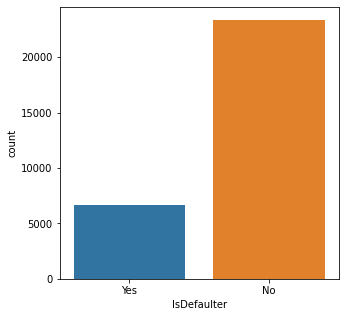

In [ ]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

- Both classes are not in proportion that is we have imbalanced dataset.

<AxesSubplot:xlabel='SEX', ylabel='count'>

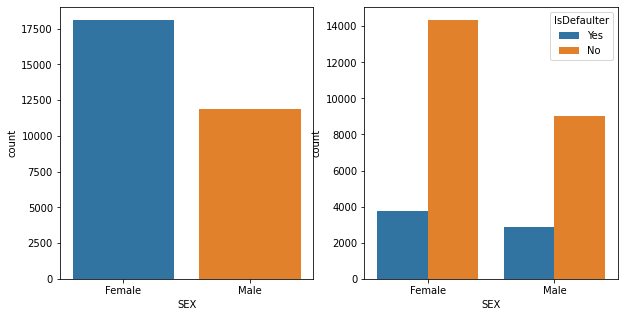

In [ ]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

Even though the number of male customers are less compared to the female, the percentage of defaulters is high in Male customers.

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

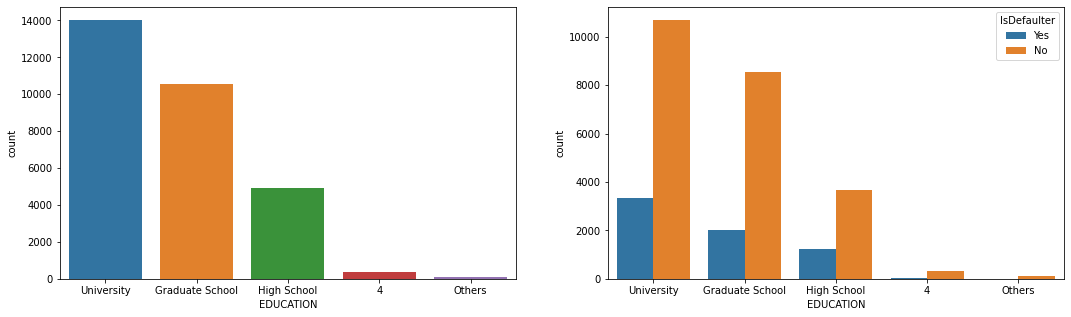

In [ ]:
#replcae values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

Defaulters in Graduate school, University, High school and others are 2036, 3330,1237 and 33 respectively and non defaulters are 8549,10700,3680 and 435 respectively.

Even the number of customers whose education level is High School is very less compared to Graduate school and University, the default number is very high.

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

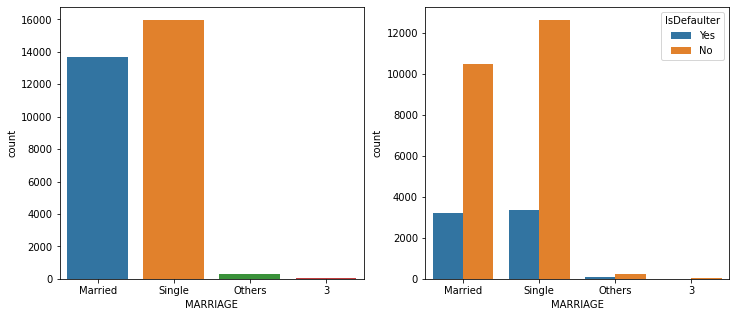

In [ ]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(12,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

 Even the married customers are less than unmarried, their default percentage is high than the unmarried. 

In [ ]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='count'>

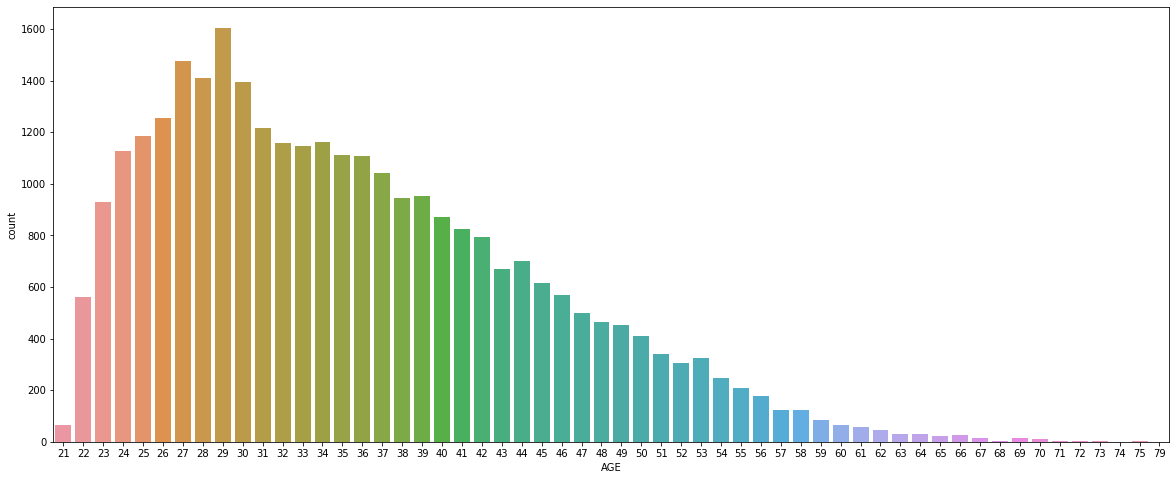

In [ ]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<AxesSubplot:xlabel='AGE', ylabel='count'>

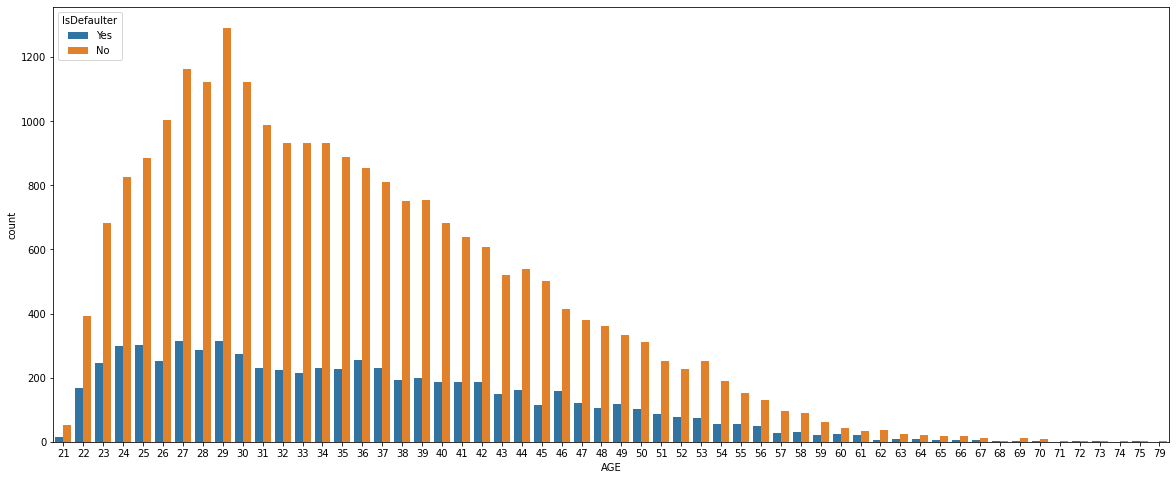

In [ ]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

Most people in our dataset ranges in between 25 and 40 years old.

As the more number of defaulters are between the Age of 20 to 25, and greater than 60 years even the customers are less. Proper review has to be done before issueing the credit card. Else it may impact the business growth negatively.

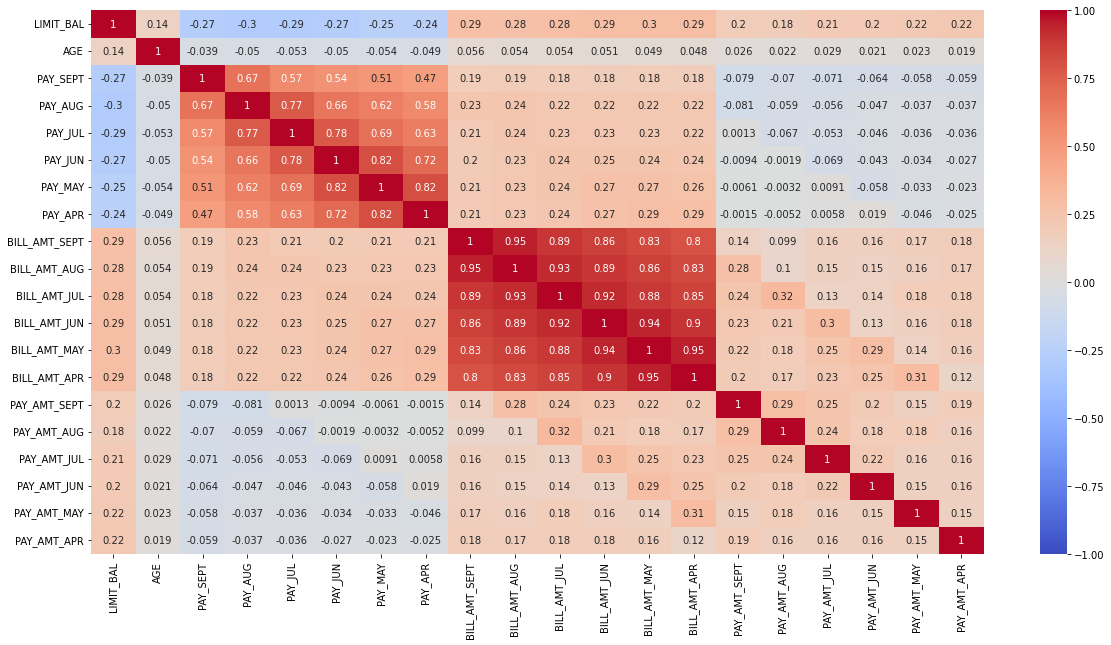

In [ ]:
# Plotting the Correlation for the different elelments of the dataset.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),vmin=-1, cmap='coolwarm',annot=True )
plt.show()
     

Default is positively correlated to Education, Age, Bill Amount6 and Past payment statues(1-6).
Bill Amounts are highly correlated to each other.
Past Payments Stauts are also highly correlated to each other.

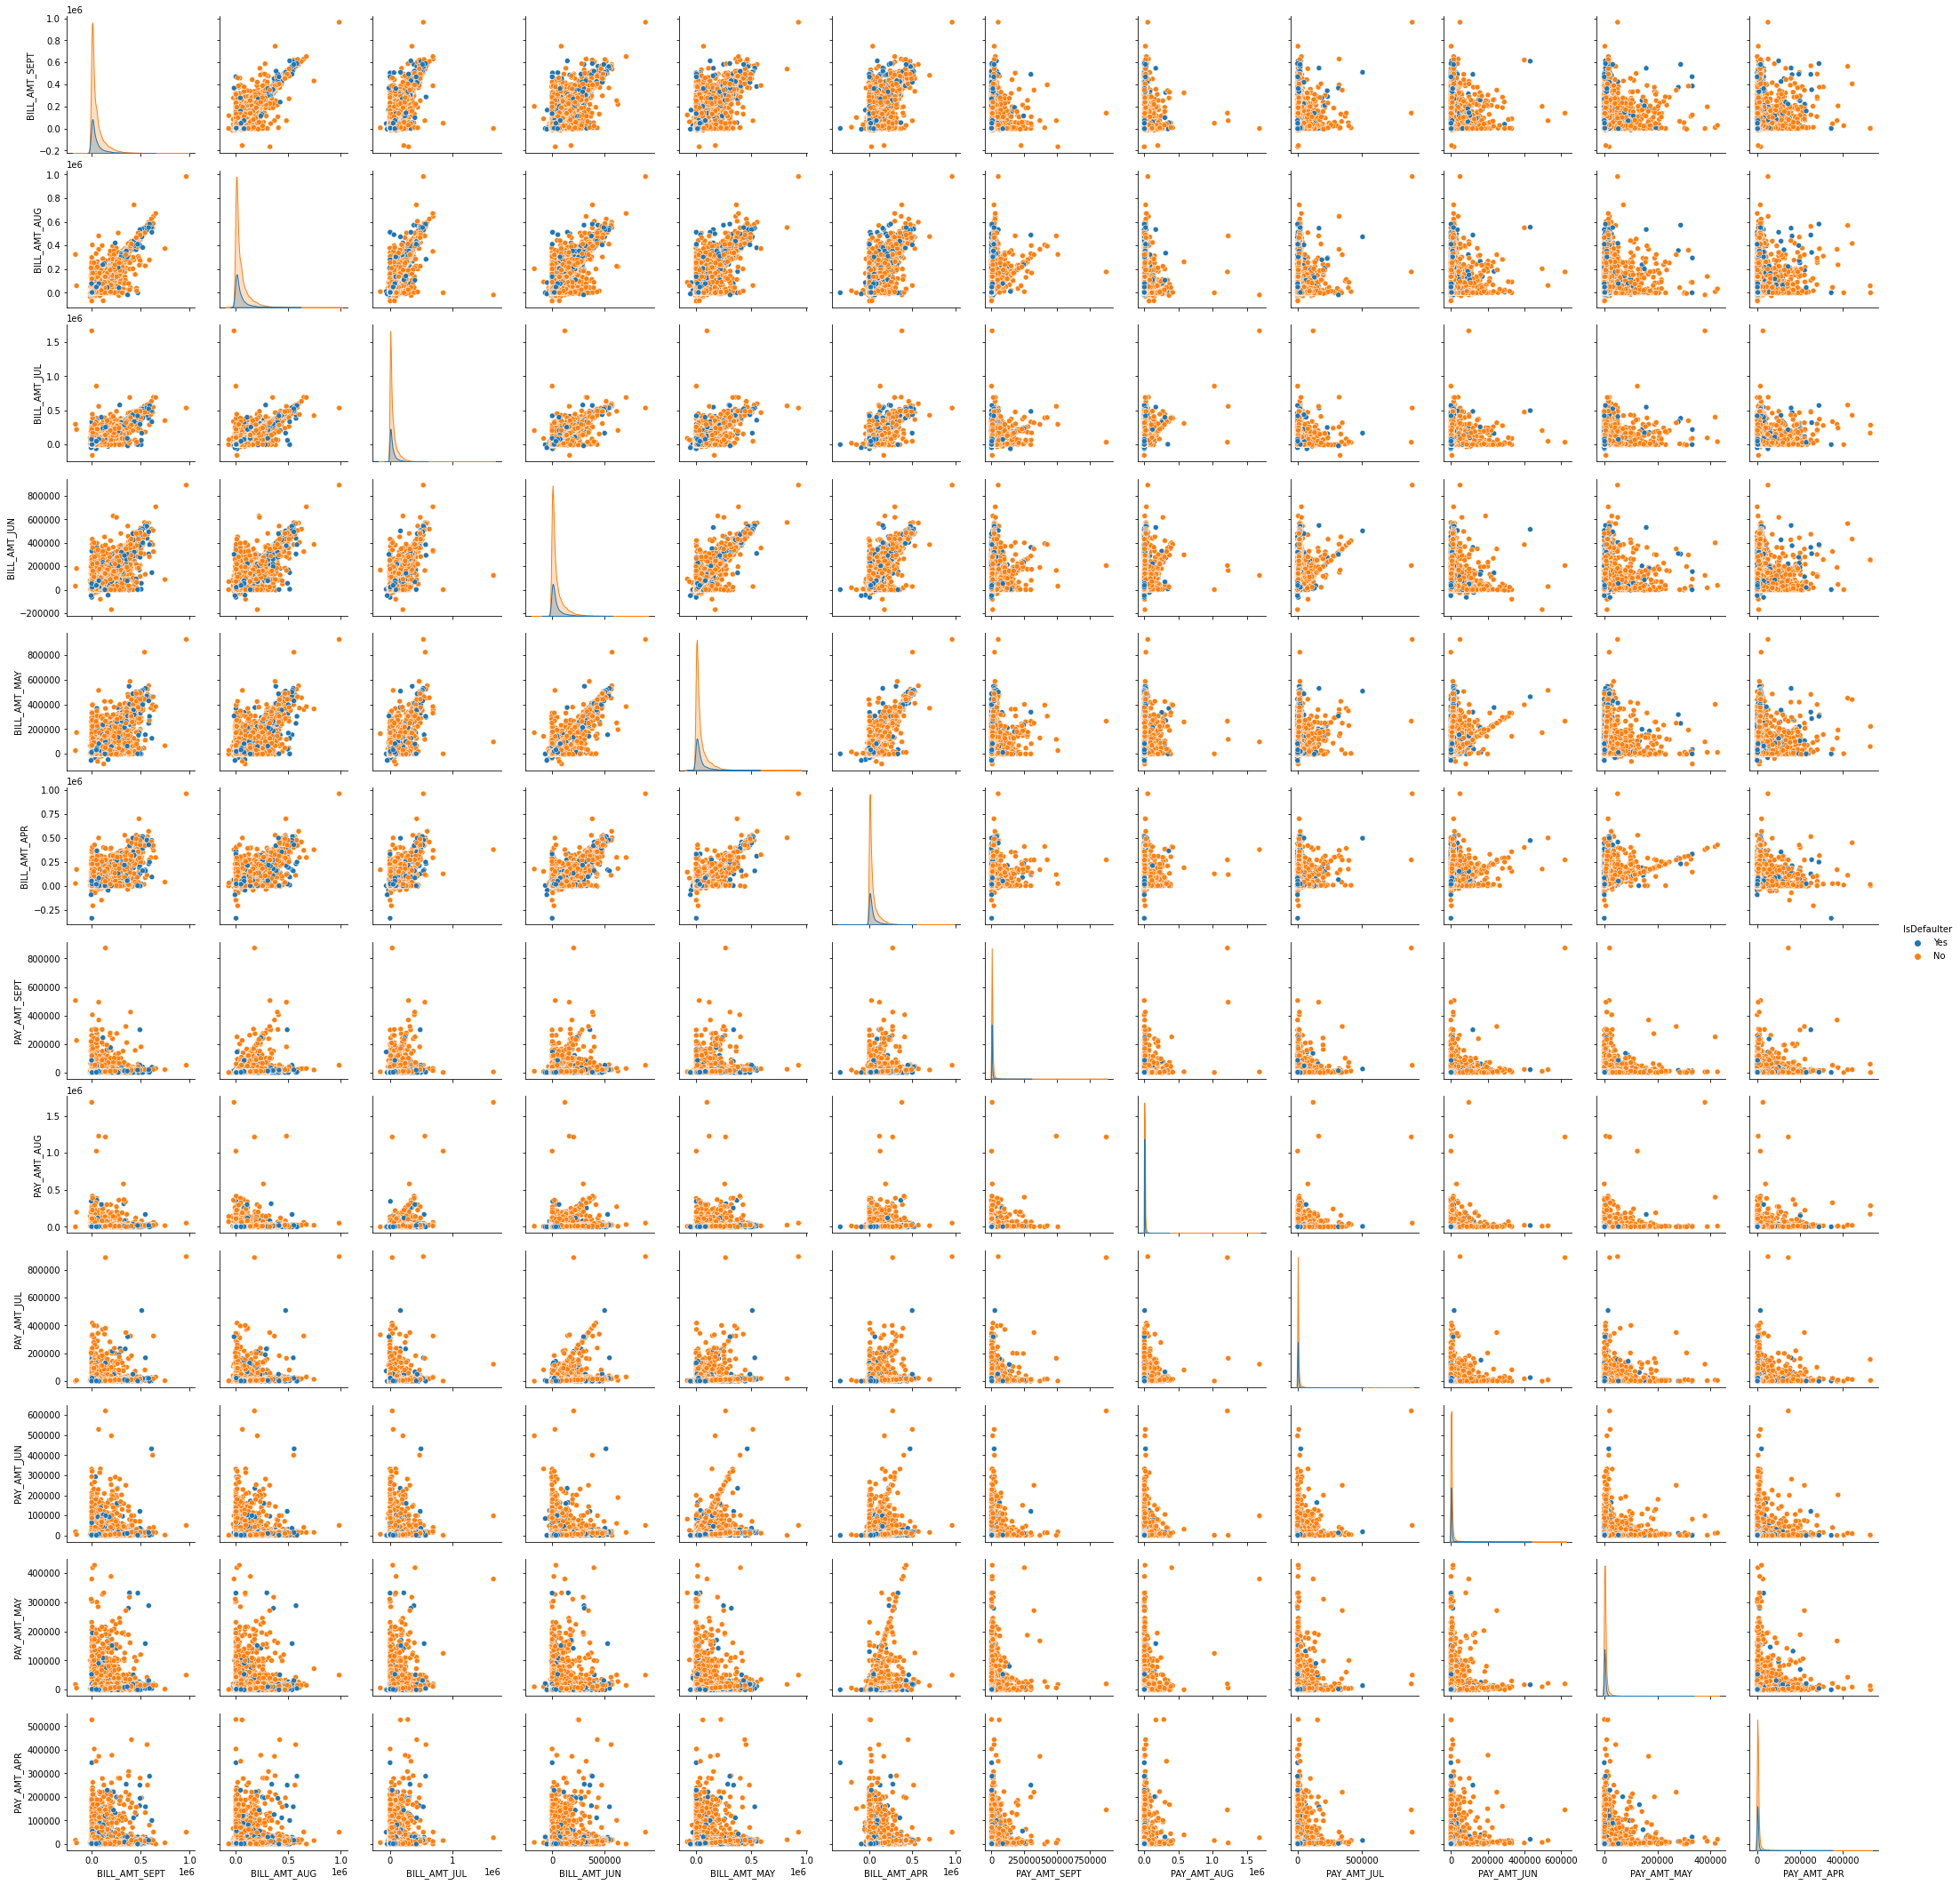

In [ ]:
# Pair Plot visualization

sns.pairplot(df,vars=df.columns[11:-1], kind='scatter',hue= 'IsDefaulter')
plt.show()

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

So, I have used pair plot to represent the data in graphical form and to see any relationship in between the various features.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(df.isna().sum())

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
IsDefaulter      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Given dataset has no missing values to handle.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df["EDUCATION"]=df["EDUCATION"].astype('str')
df["SEX"]=df["SEX"].astype('str')
df["MARRIAGE"]=df["MARRIAGE"].astype('str')
df["PAY_SEPT"]=df["PAY_SEPT"].astype('str')
df["PAY_AUG"]=df["PAY_AUG"].astype('str')
df["PAY_JUL"]=df["PAY_JUL"].astype('str')
df["PAY_JUN"]=df["PAY_JUN"].astype('str')
df["PAY_MAY"]=df["PAY_MAY"].astype('str')
df["PAY_APR"]=df["PAY_APR"].astype('str')

symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)
non_symmetric_feature.pop()

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']


'PAY_AMT_APR'

In [ ]:
# Encode your categorical columns
df.shape

(30000, 24)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


## **Label Incoding**

In [ ]:
# Converting the value to 0 or 1
encoders_nums = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1,"No":0}}
df = df.replace(encoders_nums)

# One Hot Encoding

In [ ]:
df = pd.get_dummies(df,columns = ["EDUCATION","MARRIAGE"])

In [ ]:
df.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,IsDefaulter,EDUCATION_4,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_3,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,1,0,0,0,0,1,0,1,0,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,1,0,0,0,0,1,0,0,0,1
2,90000,0,34,0,0,0,0,0,0,29239,...,0,0,0,0,0,1,0,0,0,1
3,50000,0,37,0,0,0,0,0,0,46990,...,0,0,0,0,0,1,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
df.shape

(30000, 31)

In [ ]:
#check for all the created variables 
df.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,IsDefaulter,EDUCATION_4,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_3,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,1,0,0,0,0,1,0,1,0,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,1,0,0,0,0,1,0,0,0,1
2,90000,0,34,0,0,0,0,0,0,29239,...,0,0,0,0,0,1,0,0,0,1
3,50000,0,37,0,0,0,0,0,0,46990,...,0,0,0,0,0,1,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,0,0,0,0,1,0,1,0,0


# Handling Class Imbalance

## **SMOTE** - Synthetic Minority Oversampling Technique

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [ ]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [ ]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

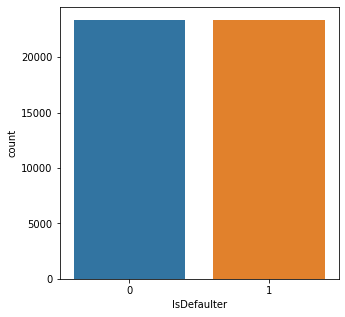

In [ ]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot('IsDefaulter', data = balanced_df)

In [ ]:
# Shape of balanced dataframe
balanced_df.shape

(46728, 31)

In [ ]:
# Final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,EDUCATION_4,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_3,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,IsDefaulter
0,20000,0,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913,...,0,0,0,0,1,0,1,0,0,1
1,120000,0,26,-1.0,2.0,0.0,0.0,0.0,2.0,2682,...,0,0,0,0,1,0,0,0,1,1
2,90000,0,34,0.0,0.0,0.0,0.0,0.0,0.0,29239,...,0,0,0,0,1,0,0,0,1,0
3,50000,0,37,0.0,0.0,0.0,0.0,0.0,0.0,46990,...,0,0,0,0,1,0,1,0,0,0
4,50000,1,57,-1.0,0.0,-1.0,0.0,0.0,0.0,8617,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# To display upto 200 columns and rows at once
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
#correlation among all the features
balanced_df.corr()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_4,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_3,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,IsDefaulter
LIMIT_BAL,1.000000,-0.002766,0.159754,0.310339,0.302212,0.304913,0.311135,0.312940,0.305337,0.197446,0.182177,0.209004,0.205758,0.215456,0.220778,0.008807,0.287863,-0.099637,0.027167,-0.120028,-0.005784,0.137046,-0.038103,-0.051461,-0.188696
SEX,-0.002766,1.000000,0.087046,0.030020,0.027260,0.020715,0.017082,0.012135,0.012476,0.017454,0.015779,0.020021,0.012883,0.014452,0.014766,0.008410,0.068309,0.048472,0.001769,0.025205,-0.004797,0.021303,0.014037,0.079662,-0.129180
AGE,0.159754,0.087046,1.000000,0.055903,0.053993,0.055040,0.053372,0.051139,0.049758,0.028724,0.023274,0.026135,0.016705,0.019915,0.020828,0.015558,-0.069516,0.200807,-0.008815,-0.073926,0.009434,0.409026,0.070782,-0.411939,-0.005617
BILL_AMT_SEPT,0.310339,0.030020,0.055903,1.000000,0.963116,0.914817,0.882840,0.854444,0.829973,0.167450,0.115544,0.177440,0.180934,0.189594,0.203007,0.033701,-0.019012,-0.019399,0.003138,0.026668,-0.013765,0.030100,-0.008459,-0.015817,-0.025194
BILL_AMT_AUG,0.302212,0.027260,0.053993,0.963116,1.000000,0.944710,0.910785,0.880739,0.854046,0.283427,0.116994,0.171071,0.171190,0.174562,0.196247,0.030225,-0.017247,-0.020811,-0.000837,0.024156,-0.011694,0.026202,-0.010377,-0.015338,-0.017491
BILL_AMT_JUL,0.304913,0.020715,0.055040,0.914817,0.944710,1.000000,0.939425,0.904311,0.875432,0.255981,0.296582,0.149584,0.164706,0.190971,0.203005,0.028726,-0.011593,-0.021121,-0.001034,0.020155,-0.013360,0.029278,-0.011554,-0.017958,-0.016791
BILL_AMT_JUN,0.311135,0.017082,0.053372,0.882840,0.910785,0.939425,1.000000,0.951951,0.918047,0.244356,0.206945,0.298994,0.150210,0.174634,0.192547,0.021871,-0.004422,-0.028003,-0.002586,0.018637,-0.012595,0.027461,-0.015463,-0.016791,-0.012528
BILL_AMT_MAY,0.312940,0.012135,0.051139,0.854444,0.880739,0.904311,0.951951,1.000000,0.956431,0.228558,0.184914,0.258810,0.292728,0.158198,0.178040,0.014457,0.000198,-0.029593,-0.005274,0.014707,-0.012466,0.028089,-0.016571,-0.018541,-0.006826
BILL_AMT_APR,0.305337,0.012476,0.049758,0.829973,0.854046,0.875432,0.918047,0.956431,1.000000,0.209366,0.173341,0.240669,0.252500,0.303605,0.127183,0.006715,-0.003683,-0.029878,-0.005742,0.017630,-0.012524,0.024367,-0.014677,-0.016960,-0.003813
PAY_AMT_SEPT,0.197446,0.017454,0.028724,0.167450,0.283427,0.255981,0.244356,0.228558,0.209366,1.000000,0.281452,0.246566,0.201530,0.149190,0.192473,0.010765,0.062858,-0.004240,0.002482,-0.010895,0.007280,0.024748,0.012314,0.011885,-0.108881


In [ ]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [ ]:
X.shape

(46728, 30)

In [ ]:
y.shape

(46728,)

## Data Transformation

In [ ]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Splitting

In [ ]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_train.shape

(37382, 30)

In [ ]:
X_test.shape

(9346, 30)

## ***7. ML Model Implementation***

# **Baseline Model Implementation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

## **Decision Tree Classification**

In [ ]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [ ]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.999
The accuracy on test data is  0.817
The precision on test data is  0.833
The recall on test data is  0.807
The f1 on test data is  0.82
The roc_score on test data is  0.817


In [ ]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

[[3744  929]
 [ 781 3892]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

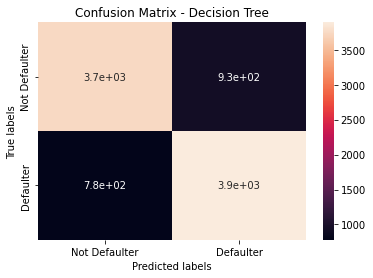

In [ ]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Random Forest Classification**

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.879
The precision on test data is  0.837
The recall on test data is  0.913
The f1 on test data is  0.873
The roc_score on test data is  0.881


In [ ]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

[[4299  374]
 [ 761 3912]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

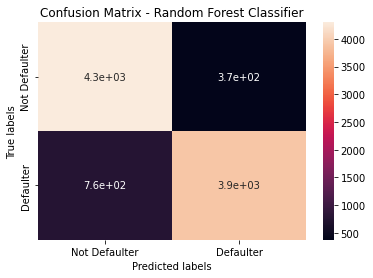

In [ ]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **XG Boosting**

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [ ]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [ ]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.911
The accuracy on test data is  0.876
The precision on test data is  0.818
The recall on test data is  0.925
The f1 on test data is  0.868
The roc_score on test data is  0.881


In [ ]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

[[4364  309]
 [ 849 3824]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

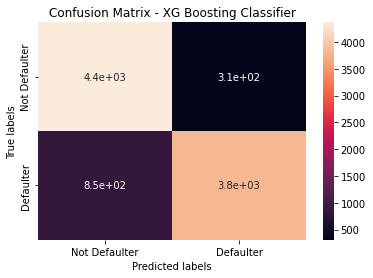

In [ ]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Baseline Model Compairision**

In [ ]:
all_lassifiers = [ 'Decision Tree', 'Random Forest', 'XG Boosting']
all_train_accuracy = [ train_accuracy_dtc, train_accuracy_rfc, train_accuracy_xgb]
all_test_accuracy = [accuracy_dtc, accuracy_rfc, accuracy_xgb]
all_precision_score = [ precision_score_dtc, precision_score_rfc, precision_score_xgb]
all_recall_score = [recall_score_dtc, recall_score_rfc, recall_score_xgb]
all_f1_score = [f1_score_dtc, f1_score_rfc, f1_score_xgb]
all_auc_score = [roc_score_dtc, roc_score_rfc, roc_score_xgb]

In [ ]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [ ]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree,0.999,0.817,0.833,0.807,0.820,0.817
1,Random Forest,0.999,0.879,0.837,0.913,0.873,0.881
2,XG Boosting,0.911,0.876,0.818,0.925,0.868,0.881


In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
1,Random Forest,0.999,0.879,0.837,0.913,0.873,0.881
2,XG Boosting,0.911,0.876,0.818,0.925,0.868,0.881
0,Decision Tree,0.999,0.817,0.833,0.807,0.820,0.817


- Random forest classifier shows highest test accuracy and F1 score.

## Combined ROC curve for all the models

In [ ]:
# importing roc curve
from sklearn.metrics import roc_curve

In [ ]:
# probabilty prediction of y for all model
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]


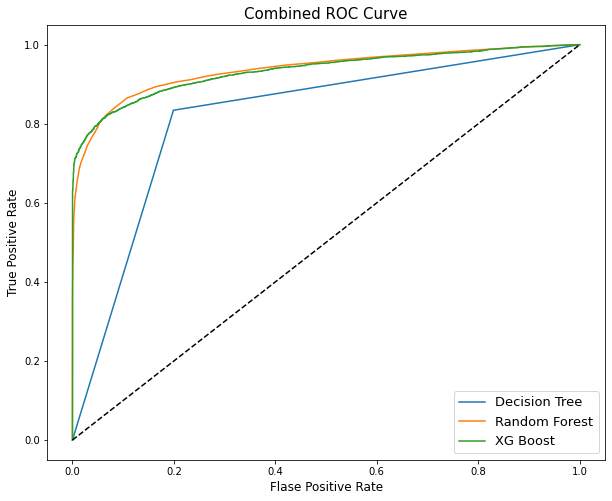

In [ ]:
fig = plt.figure(figsize=(10,8)) 
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)


plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Decision Tree", "Random Forest", "XG Boost"], prop={'size':13}, loc='lower right' )

# **Feature Importance On Random Forest Model**

In [ ]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter')

In [ ]:
feature_importances_rfc = rfc.feature_importances_

In [ ]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [ ]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

PAY_SEPT            0.123259
PAY_AUG             0.079637
PAY_JUL             0.071939
BILL_AMT_SEPT       0.043785
LIMIT_BAL           0.042568
MARRIAGE_Married    0.041381
PAY_JUN             0.040610
AGE                 0.039663
PAY_AMT_SEPT        0.038866
PAY_AMT_AUG         0.036408
BILL_AMT_AUG        0.035817
PAY_MAY             0.034098
BILL_AMT_JUL        0.033671
BILL_AMT_MAY        0.031820
BILL_AMT_JUN        0.031380
dtype: float64

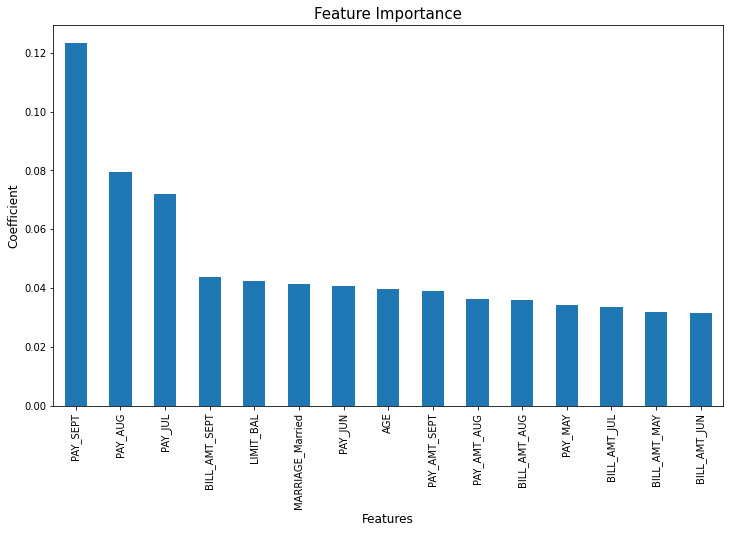

In [ ]:
fig = plt.figure(figsize=(12,7)) 
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

- Above 15 features are the most important features of random forest classifier.

# **Cross Validation & Hyperparameter Tuning** 

In [ ]:
from sklearn.model_selection import GridSearchCV

## **Decision Tree Classification with Cross Validation & Hyperparameter Tuning**

In [ ]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [ ]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50,
                       min_samples_split=0.001)

In [ ]:
dtc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 0.001}

In [ ]:
dtc_optimal_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.853
The accuracy on test data is  0.838
The precision on test data is  0.789
The recall on test data is  0.875
The f1 on test data is  0.83
The auc on test data is  0.842


In [ ]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [ ]:
train_cm_dtc_grid

array([[16998,  1693],
       [ 3804, 14887]])

In [ ]:
test_cm_dtc_grid

array([[4148,  525],
       [ 985, 3688]])

## **Random Forest Classifer**

In [ ]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  10.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  12.9s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  12.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   9.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   9.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   9.2s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=150)

In [ ]:
rfc_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.859
The accuracy on test data is  0.849
The precision on test data is  0.807
The recall on test data is  0.881
The f1 on test data is  0.842
The auc on test data is  0.851


In [ ]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [ ]:
train_cm_rfc_grid

array([[16801,  1890],
       [ 3393, 15298]])

In [ ]:
test_cm_rfc_grid

array([[4162,  511],
       [ 901, 3772]])

## **XG Boosting**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, min_samples_leaf=50, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 50,
 'min_child_weight': 1,
 'max_depth': 20,
 'learning_rate': 0.05,
 'gamma': 0.3}

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  0.998
The accuracy on test data is  0.885
The precision on test data is  0.837
The recall on test data is  0.925
The f1 on test data is  0.879
The auc on test data is  0.888


In [ ]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

# **Final Model Comparision**

In [ ]:
grid_classifiers = ['Optimal Decision Tree', 'Optimal Random Forest', 'Optimal XG Boosting']

grid_train_accuracy = [train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [ accuracy_dtc_grid, accuracy_rfc_grid, accuracy_xgb_grid]

grid_precision_score = [ precision_score_dtc_grid, precision_score_rfc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_dtc_grid, recall_score_rfc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_dtc_grid, f1_score_rfc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_dtc_grid, auc_rfc_grid, auc_xgb_grid]

In [ ]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [ ]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [ ]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [ ]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [ ]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
11,Optimal XG Boosting,0.998,0.885,0.837,0.925,0.879,0.888
2,Random Forest,0.999,0.882,0.841,0.916,0.877,0.884
10,Optimal Gradient Boosting,0.937,0.880,0.831,0.922,0.874,0.884
5,XG Boosting,0.915,0.877,0.820,0.925,0.869,0.882
4,Gradient Boosting,0.874,0.874,0.805,0.934,0.865,0.881
9,Optimal SVM,0.873,0.857,0.784,0.918,0.846,0.865
8,Optimal Random Forest,0.868,0.861,0.817,0.897,0.855,0.864
3,SVM,0.846,0.840,0.756,0.909,0.825,0.850
0,Logistic Regression,0.833,0.831,0.729,0.915,0.812,0.845
6,Optimal Logistic Regression,0.833,0.831,0.729,0.915,0.812,0.845


# **Conclusion**

* From all baseline model, Random forest classifier shows highest test accuracy and F1 score and AUC.

* Baseline model of Random forest and decision tree shows huge difference in train and test accuracy which shows overfitting.

* After cross validation and hyperparameter tunning, XG Boost shows highest test accuracy score of 87.10% and AUC is 0.874.

* Cross validation and hyperparameter tunning certainly reduces chances of overfitting and also increases performance of model.